In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

# 1I

## minimization

In [2]:
dir_1i_min="/home/german/labo/17/alex/run/1i/mhe/m"
im1_min_Etot = readdlm("$dir_1i_min/outputs/Etot_min");
im1_mmin_Etot = readdlm("$dir_1i_min/outputs/Etot_mmin");
df_1i_MIN_Etot = DataFrame(E=[im1_min_Etot[:, 2]; im1_mmin_Etot[:, 2]],
NSTEP=[im1_min_Etot[:, 1]; (im1_mmin_Etot[:, 1] .+ 500) ]);

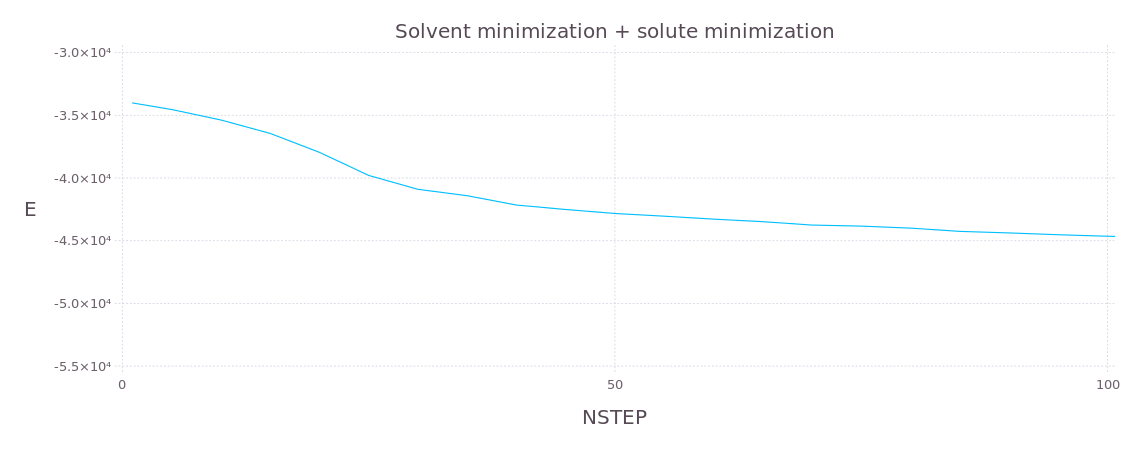

In [3]:
plot(df_1i_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [4]:
# Energies
dir_1i_hea="/home/german/labo/17/alex/run/1i/mhe/h"
im1_hea_Ek = readdlm("$dir_1i_hea/outputs/ektot.dat");
im1_hea_Ep = readdlm("$dir_1i_hea/outputs/eptot.dat");
im1_hea_Etot = readdlm("$dir_1i_hea/outputs/etot.dat");

df_1i_HEA_E = DataFrame(E=[im1_hea_Ek[:, 2]; im1_hea_Ep[:, 2]; im1_hea_Etot[:, 2]],
NSTEP=[im1_hea_Ek[:, 1]; im1_hea_Ep[:, 1]; im1_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im1_hea_Ek[:, 1])]));

# Temperature
im1_hea_T = readdlm("$dir_1i_hea/outputs/temp.dat");
df_1i_HEA_T = DataFrame(Temperature=im1_hea_T[:, 2],
NSTEP=im1_hea_T[:, 1]);

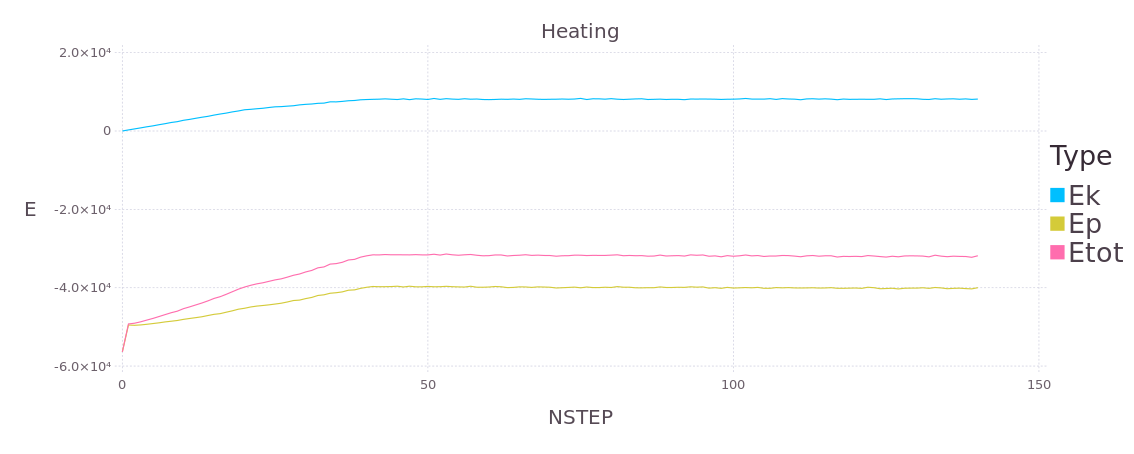

In [5]:
plot(df_1i_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

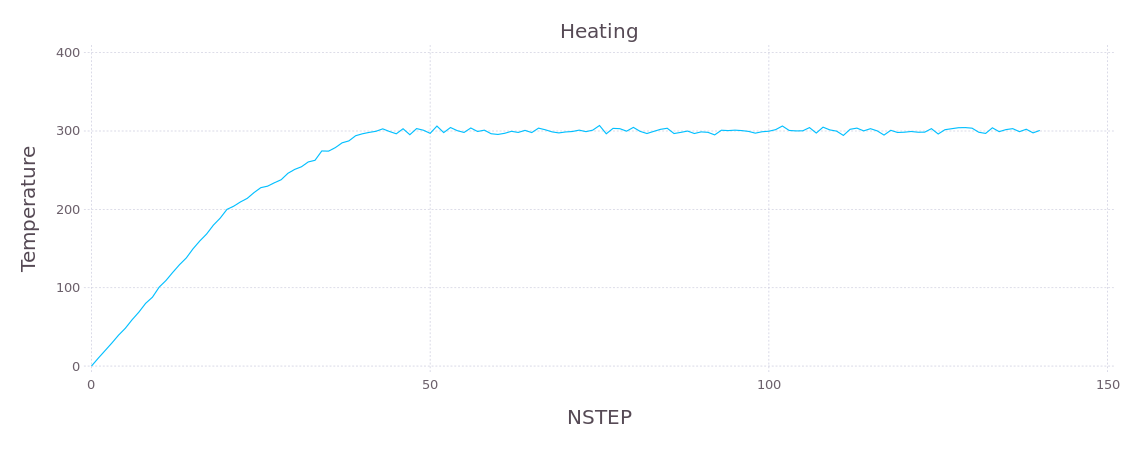

In [6]:
plot(df_1i_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [7]:
# Energies
dir_1i_equ="/home/german/labo/17/alex/run/1i/mhe/e"
im1_equ_Ek = readdlm("$dir_1i_equ/outputs/ektot.dat");
im1_equ_Ep = readdlm("$dir_1i_equ/outputs/eptot.dat");
im1_equ_Etot = readdlm("$dir_1i_equ/outputs/etot.dat");

df_1i_EQU_E = DataFrame(E=[im1_equ_Ek[:, 2]; im1_equ_Ep[:, 2]; im1_equ_Etot[:, 2]],
NSTEP=[im1_equ_Ek[:, 1]; im1_equ_Ep[:, 1]; im1_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im1_equ_Ek[:, 1])]));

# Temperature
im1_equ_T = readdlm("$dir_1i_equ/outputs/temp.dat");
df_1i_EQU_T = DataFrame(Temperature=im1_equ_T[:, 2],
NSTEP=im1_equ_T[:, 1]);

# RMSD ntwx=500
im1_equ_rmsd = readdlm("$dir_1i_equ/rmsd_equ_1i");
df_1i_EQU_RMSD = DataFrame(RMSD=im1_equ_rmsd[:, 2], Frame=im1_equ_rmsd[:, 1]);

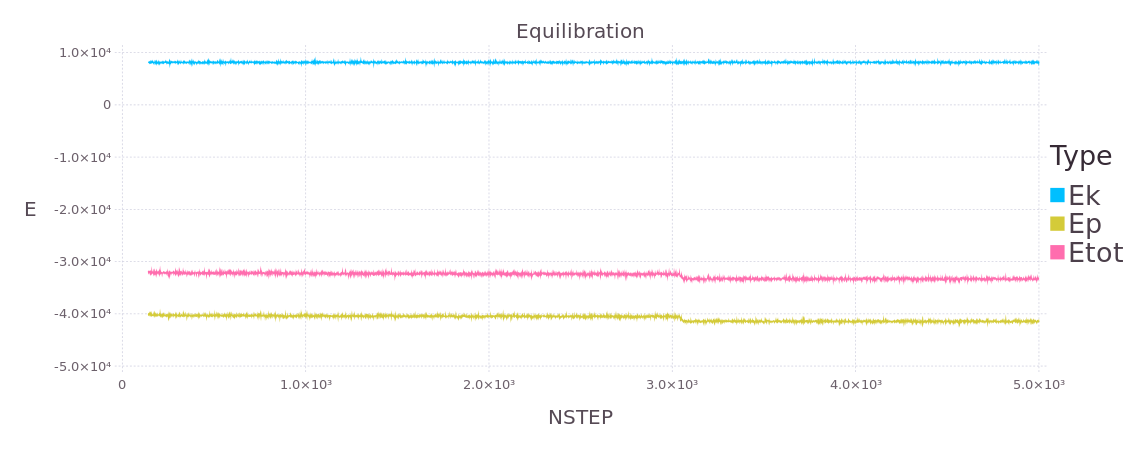

In [8]:
plot(df_1i_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

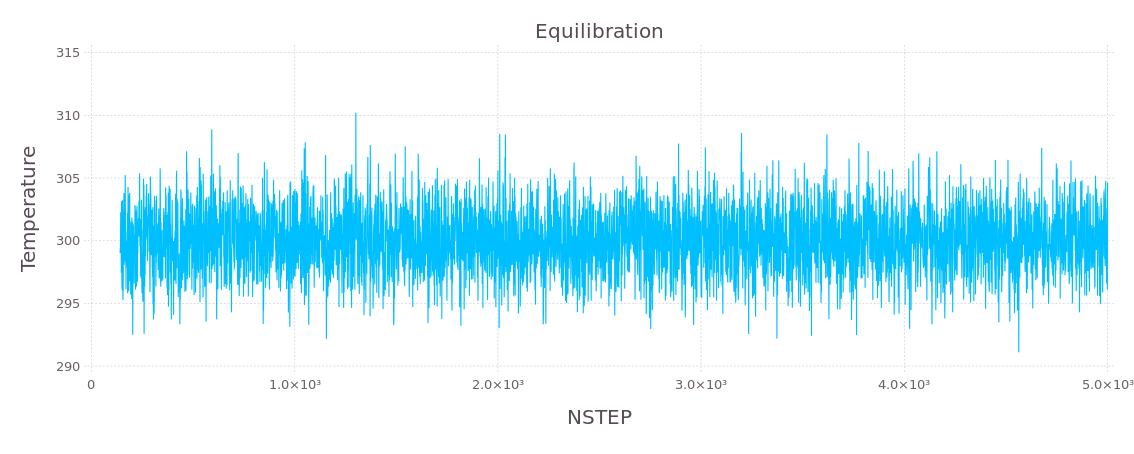

In [9]:
plot(df_1i_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

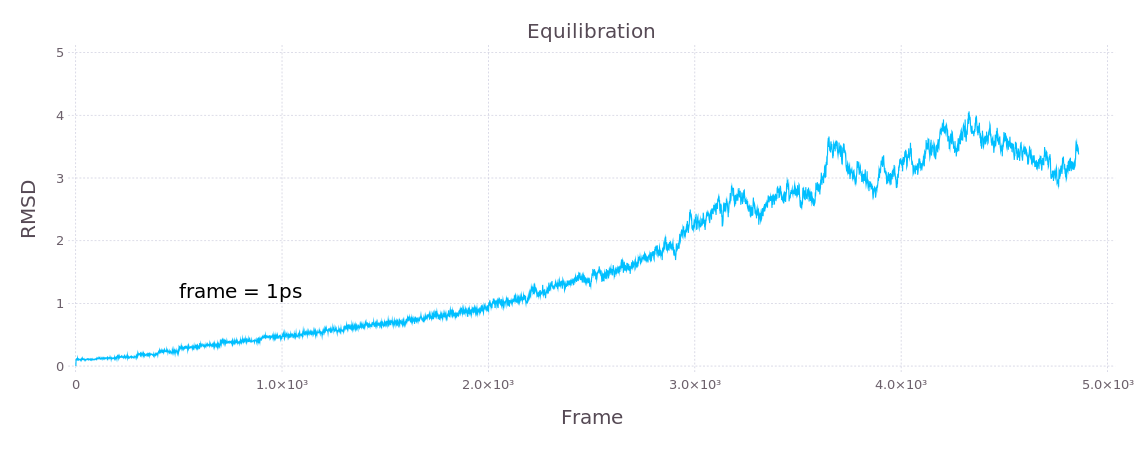

In [10]:
# Escribo c/ 1ps
plot(df_1i_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### production

In [11]:
# Energies
dir_1i_pdt = "/home/german/labo/17/alex/run/1i"
im1_pdt_Ek = readdlm("$dir_1i_pdt/data/outputs/ektot.dat");
im1_pdt_Ep = readdlm("$dir_1i_pdt/data/outputs/eptot.dat");
im1_pdt_Etot = readdlm("$dir_1i_pdt/data/outputs/etot.dat");
df_1i_PDT_E = DataFrame(E=[im1_pdt_Ek[:, 2]; im1_pdt_Ep[:, 2]; im1_pdt_Etot[:, 2]],
NSTEP=[im1_pdt_Ek[:, 1]; im1_pdt_Ep[:, 1]; im1_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im1_pdt_Ek[:, 1])]));

# Temperature
im1_pdt_T = readdlm("$dir_1i_pdt/data/outputs/temp.dat");
df_1i_PDT_T = DataFrame(Temperature=im1_pdt_T[:, 2],
NSTEP=im1_pdt_T[:, 1]);

# RMSD 
im1_pdt_rmsd = readdlm("$dir_1i_pdt/data/rmsd_1i");
df_1i_PDT_RMSD = DataFrame(RMSD=im1_pdt_rmsd[:, 2], Frame=im1_pdt_rmsd[:, 1]);

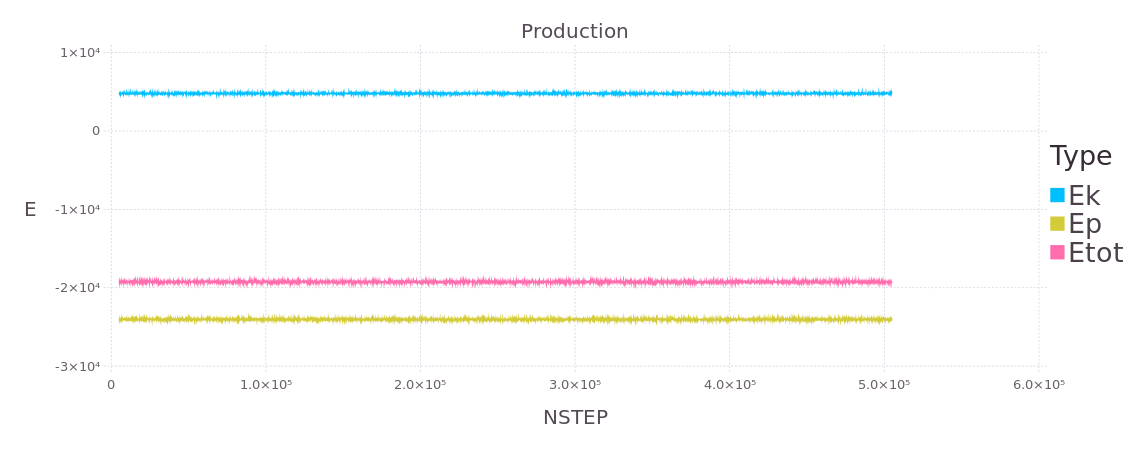

In [12]:
plot(df_1i_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

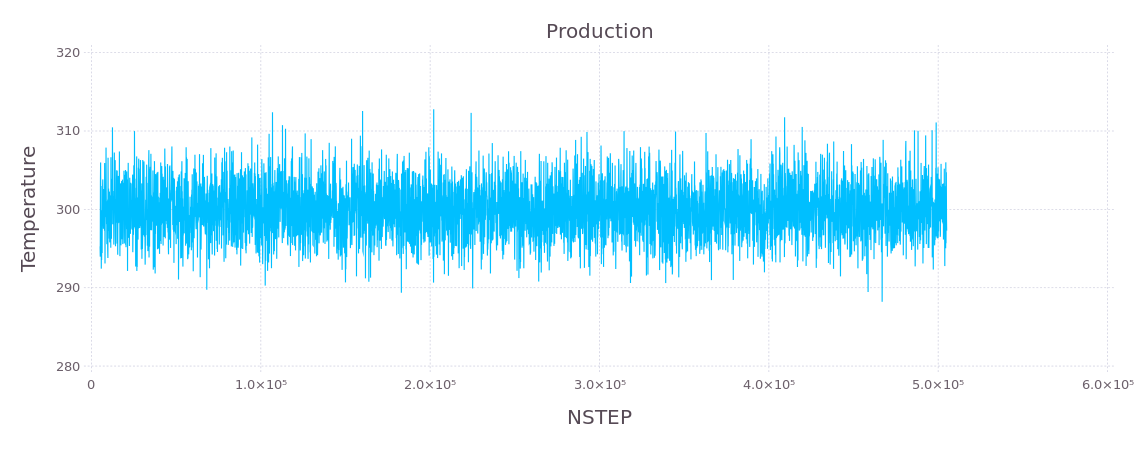

In [13]:
plot(df_1i_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

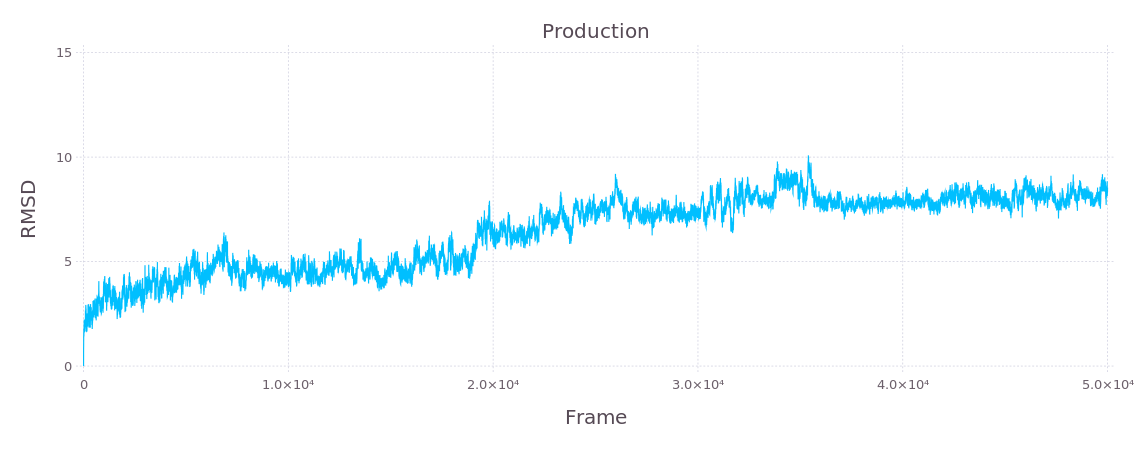

In [14]:
plot(df_1i_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 3.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

# 1R

## minimization

In [11]:
dir_1r_min="/home/german/labo/17/alex/run/1r/mhe/m"
im3_min_Etot = readdlm("$dir_1r_min/outputs/Etot_min");
im3_mmin_Etot = readdlm("$dir_1r_min/outputs/Etot_mmin");
df_1r_MIN_Etot = DataFrame(E=[im3_min_Etot[:, 2]; im3_mmin_Etot[:, 2]],
NSTEP=[im3_min_Etot[:, 1]; im3_mmin_Etot[:, 1] .+ 500]);

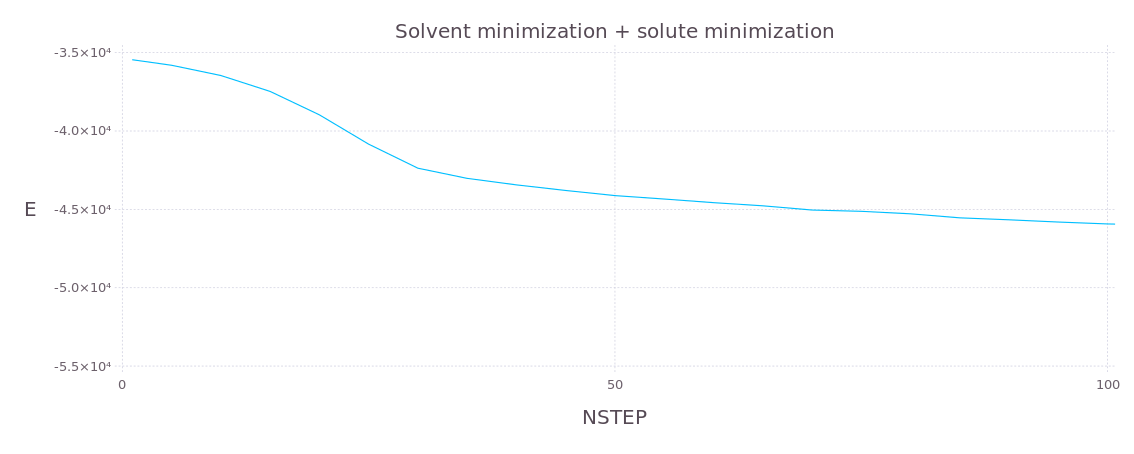

In [12]:
plot(df_1r_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [13]:
# Energies
dir_1r_hea="/home/german/labo/17/alex/run/1r/mhe/h"
im3_hea_Ek = readdlm("$dir_1r_hea/outputs/ektot.dat");
im3_hea_Ep = readdlm("$dir_1r_hea/outputs/eptot.dat");
im3_hea_Etot = readdlm("$dir_1r_hea/outputs/etot.dat");

df_1r_HEA_E = DataFrame(E=[im3_hea_Ek[:, 2]; im3_hea_Ep[:, 2]; im3_hea_Etot[:,
2]],
NSTEP=[im3_hea_Ek[:, 1]; im3_hea_Ep[:, 1]; im3_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im3_hea_Ek[:, 1])]));

# Temperature
im3_hea_T = readdlm("$dir_1r_hea/outputs/temp.dat");
df_1r_HEA_T = DataFrame(Temperature=im3_hea_T[:, 2],
NSTEP=im3_hea_T[:, 1]);

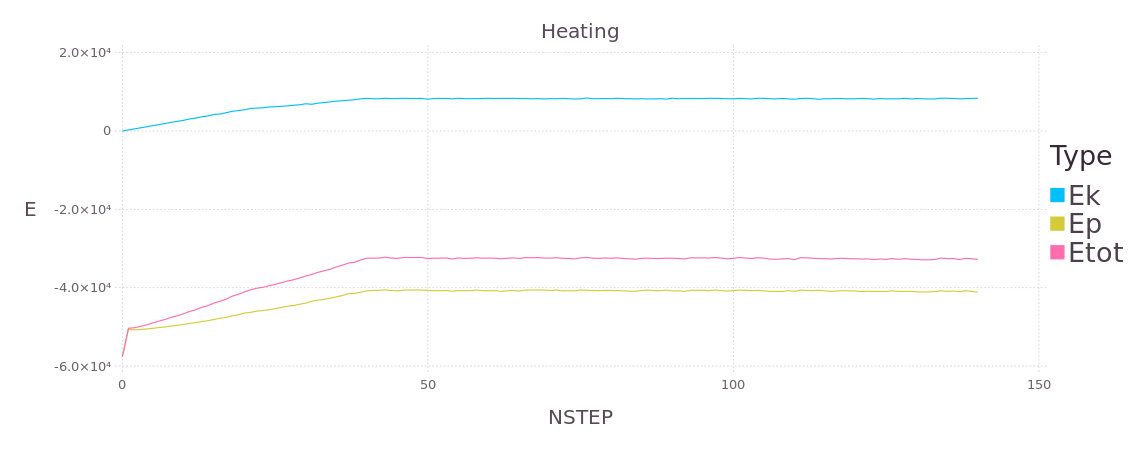

In [14]:
plot(df_1r_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

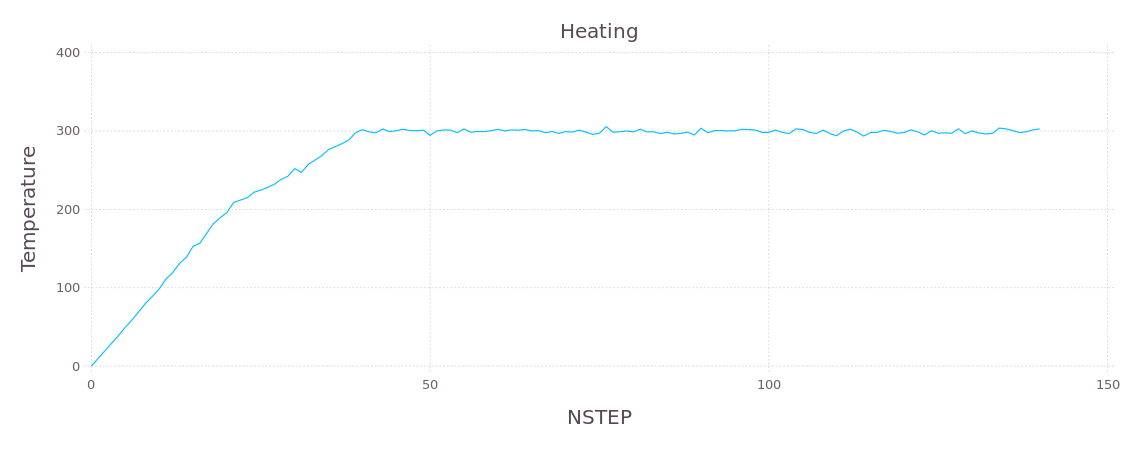

In [15]:
plot(df_1r_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [16]:
# Energies
dir_1r_equ="/home/german/labo/17/alex/run/1r/mhe/e"
im3_equ_Ek = readdlm("$dir_1r_equ/outputs/ektot.dat");
im3_equ_Ep = readdlm("$dir_1r_equ/outputs/eptot.dat");
im3_equ_Etot = readdlm("$dir_1r_equ/outputs/etot.dat");

df_1r_EQU_E = DataFrame(E=[im3_equ_Ek[:, 2]; im3_equ_Ep[:, 2]; im3_equ_Etot[:,
2]],
NSTEP=[im3_equ_Ek[:, 1]; im3_equ_Ep[:, 1]; im3_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im3_equ_Ek[:, 1])]));

# Temperature
im3_equ_T = readdlm("$dir_1r_equ/outputs/temp.dat");
df_1r_EQU_T = DataFrame(Temperature=im3_equ_T[:, 2],
NSTEP=im3_equ_T[:, 1]);

# RMSD ntwx=500
im3_equ_rmsd = readdlm("$dir_1r_equ/rmsd_equ_1r");
df_1r_EQU_RMSD = DataFrame(RMSD=im3_equ_rmsd[:, 2], Frame=im3_equ_rmsd[:, 1]);

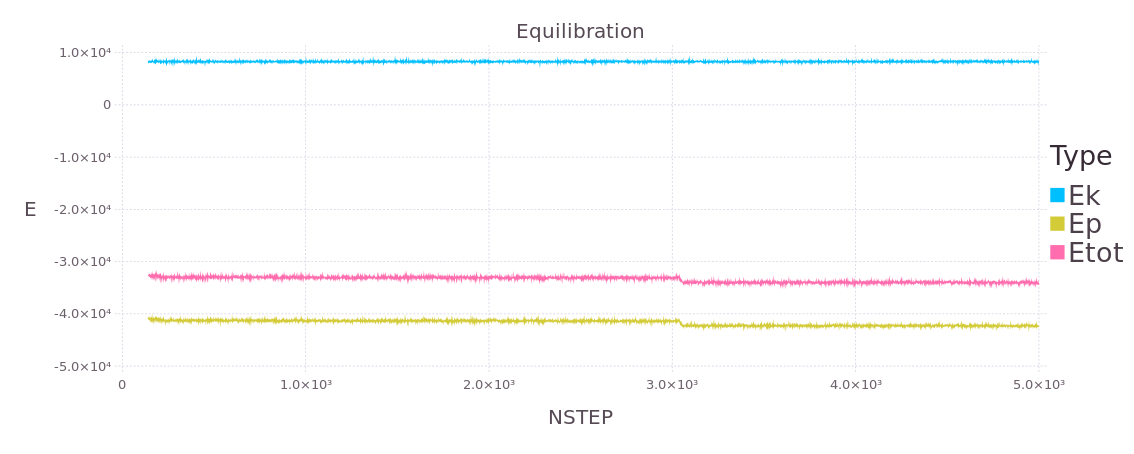

In [17]:
plot(df_1r_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

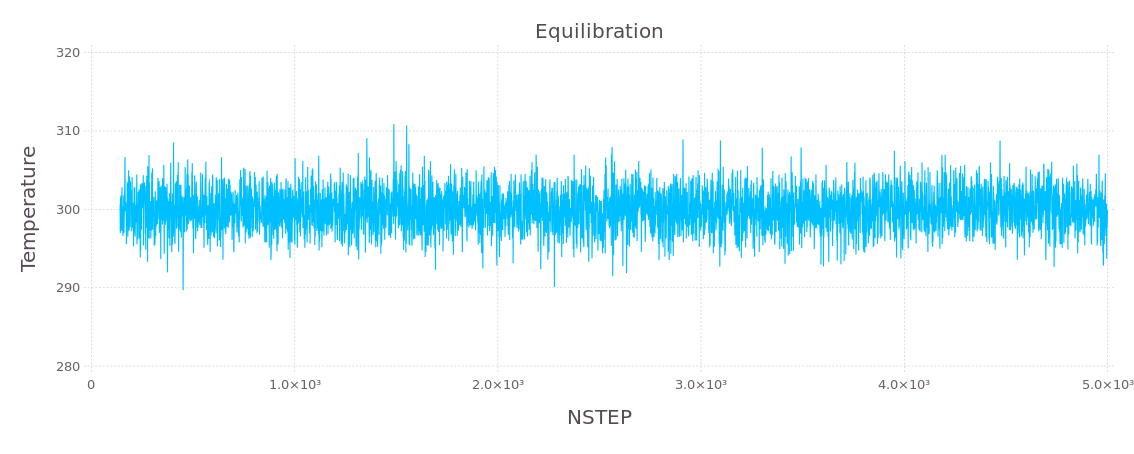

In [18]:
plot(df_1r_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

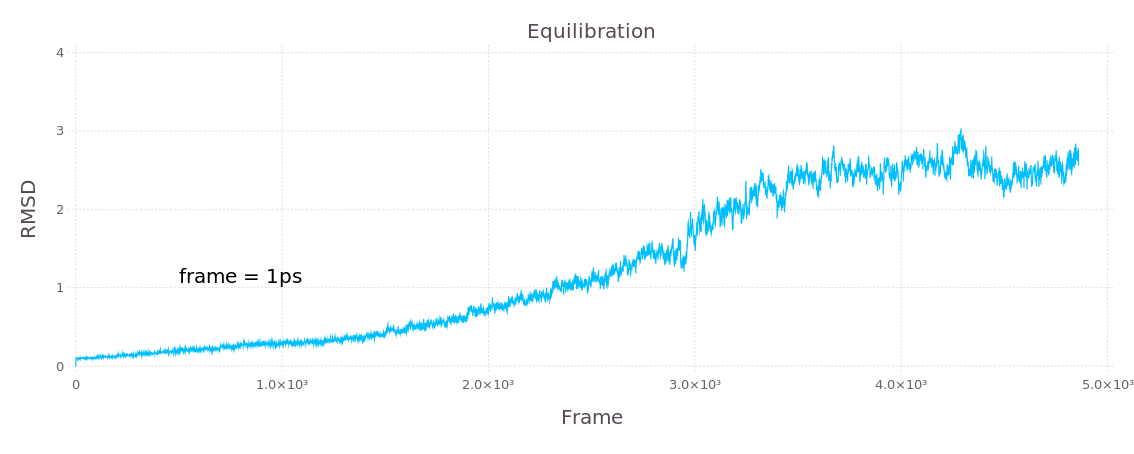

In [19]:
# Escribo c/ 1ps
plot(df_1r_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### production

In [20]:
# Energies
dir_1r_pdt = "/home/german/labo/17/alex/run/1r"
im3_pdt_Ek = readdlm("$dir_1r_pdt/data/outputs/ektot.dat");
im3_pdt_Ep = readdlm("$dir_1r_pdt/data/outputs/eptot.dat");
im3_pdt_Etot = readdlm("$dir_1r_pdt/data/outputs/etot.dat");
df_1r_PDT_E = DataFrame(E=[im3_pdt_Ek[:, 2]; im3_pdt_Ep[:, 2]; im3_pdt_Etot[:,
2]],
NSTEP=[im3_pdt_Ek[:, 1]; im3_pdt_Ep[:, 1]; im3_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(im3_pdt_Ek[:, 1])]));

# Temperature
im3_pdt_T = readdlm("$dir_1r_pdt/data/outputs/temp.dat");
df_1r_PDT_T = DataFrame(Temperature=im3_pdt_T[:, 2],
NSTEP=im3_pdt_T[:, 1]);

# RMSD 
im3_pdt_rmsd = readdlm("$dir_1r_pdt/data/rmsd_1r");
df_1r_PDT_RMSD = DataFrame(RMSD=im3_pdt_rmsd[:, 2], Frame=im3_pdt_rmsd[:, 1]);

LoadError: [91mSystemError: opening file /home/german/labo/17/alex/run/1r/data/outputs/ektot.dat: No such file or directory[39m

In [21]:
plot(df_1r_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

LoadError: [91mUndefVarError: df_1r_PDT_E not defined[39m

In [22]:
plot(df_1r_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_1r_PDT_T not defined[39m

In [23]:
plot(df_1r_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 3.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_1r_PDT_RMSD not defined[39m